In [1]:
#pip install xgboost

In [2]:
#pip install imblearn

In [3]:
from preprocessing_utils import *
from dataprocessor import DataPreprocessor

import warnings
import pandas as pd
# suppress warning messages
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE


from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

from tqdm import tqdm
from time import sleep
# import gradient_boosting machine



# set global seed to ensure reproducibility

seed = 42
np.random.seed(seed)





survey_data_path = "/Volumes/DeepLearner/MADS/Milestone_data/surveydata.csv"
data_5k_path = "/Volumes/DeepLearner/MADS/Milestone_data/data_5k_cleaned.csv"
config_path = "/Volumes/DeepLearner/MADS/Milestone2_Party_prediction/milestone2_MADS/preprocessing_config.json"

columns_to_use = [
    'AGE' ,'CNS_MEDINC', 'CNSUS_PCTA', 'CNSUS_PCTB',
    'CNSUS_PCTH', 'CNSUS_PCTI', 'CNSUS_PCTM', 'CNSUS_PCTO', 'CNSUS_PCTP', 'CNSUS_PCTW',
    'COUNTY_TYPE', 'EDUCATION', 'ETHNIC_INFER',
    'HOMEMKTVAL',  'NETWORTH',
    'PARTY_CODE', 'PARTY_MIX', 'PRESENCHLD', 'PRFL_POLITICAL_IDEOLOGY',
    'RELIGION', 'SEX', 'CENSUS_ST', "CENSUS_TRK",
    'TOD_PRES_D_2016',  'TOD_PRES_D_2020_PREC', 
   'TOD_PRES_O_2020_PREC', 'TOD_PRES_R_2016', 'TOD_PRES_R_2016_PREC',
    'TOD_PRES_R_2020_PREC', 'R_DONOR', 'D_DONOR', 'VOTED_R_ELECTION', 'VOTED_D_ELECTION',
     'CENSUS_TRACT','Q1_Candidate',
    'TOD_PRES_DIFF_2016','TOD_PRES_DIFF_2016_PREC','TOD_PRES_DIFF_2020_PREC', 'AI_COUNTY_NAME',
    'STATE', "GENDER_MIX", "GENERATION", "CREDRATE",
    "PRFL_BORDER_SECURITY", "PRFL_CHOICELIFE", "PRFL_CONSERVATIVE_NEWS", "PRFL_TRUMP_SUPPORT",
    "PRFL_LIBERAL_NEWS", "PRFL_IMMIGRATION_REFORM" ]

columns_to_use = [
    'AGE' ,'CNSUS_PCTA',
    'CNSUS_PCTH', 'CNSUS_PCTM', 'CNSUS_PCTO',  'CNSUS_PCTW',
    'COUNTY_TYPE', 'EDUCATION', 'ETHNIC_INFER',
    'HOMEMKTVAL',  'NETWORTH',
    'PARTY_CODE', 'PARTY_MIX', 'PRESENCHLD', 'PRFL_POLITICAL_IDEOLOGY',
    'RELIGION', "CENSUS_TRK",
    'TOD_PRES_D_2016',  'TOD_PRES_D_2020_PREC', 
    'TOD_PRES_R_2016', 'TOD_PRES_R_2016_PREC',
    'TOD_PRES_R_2020_PREC',
    'Q1_Candidate', "HH_SIZE",
    'TOD_PRES_DIFF_2016','TOD_PRES_DIFF_2016_PREC','TOD_PRES_DIFF_2020_PREC', 'AI_COUNTY_NAME',
    'STATE', "GENDER_MIX", "GENERATION", "CREDRATE",
    "PRFL_BORDER_SECURITY", "PRFL_CHOICELIFE", "PRFL_CONSERVATIVE_NEWS", "PRFL_TRUMP_SUPPORT",
 "PRFL_IMMIGRATION_REFORM", "PRFL_MINWAGE", "VTR_GEN20" ,"VTR_GEN21","VTR_GEN22",
 "VTR_OTH09", "VTR_OTH17", "VTR_PPP04", "VTR_PPP08", "VTR_PPP12", "VTR_PPP16", "VTR_PPP20",
 ]

# 'CENSUS_ST', 

#'VOTED_R_ELECTION', 'VOTED_D_ELECTION', 'CENSUS_TRACT'
     
   #  ''' "PRFL_BIDEN_SUPPORT", "PRFL_HEALTHCARE_REFORM"
  #  , "VOTER_CNT", "VOTER_TRLR",  "VP_GEN", "VP_PPP", "VP_PRI", 'DON_POLIT',"LANGUAGE",
 #   "HH_SIZE",'ZIP',  "PRFL_BLM_SUPPORT", "PRFL_LGBT_SUPPORT",
#    "PRFL_MARRIAGE_EQUALITY",  "PRFL_MINWAGE", 
#    "VTR_GEN20", "VTR_GEN22", "VTR_PPP08", "VTR_PPP16", "VTR_PPP20", "VTR_PRI22"] # "PRFL_METOO_SUPPORT"'''

#COLS REMOVED
# "LIFESTAGE_CLUSTER"
# "LENGTH_RES"
# , "PRFL_2NDAMEND"
# "LANGUAGE"
# "PRFL_MINWAGE"
#  "VP_OTH"
# PRFL_MINWAGE
# 'COUNTY_ST'
# 'HOMEOWNRNT'
# , 'DON_POLIT'
# "LANGUAGE",
#"HH_SIZE"
# 'ZIP',
#  "CENSUS_TRK",
# STATE_CD',
# 'TOD_PRES_D_2016_PREC',
# 'STATE_LOWER_HOUSE'
# 'STATE_UPPER_HOUSE', 
#  "VP_OTH"
# "ADD_TYPE"
# 'STATE_COUNTY_FIPS'
# "PRFL_METOO_SUPPORT",
# "LIFESTAGE_CLUSTER",
# INCOMESTHH',
# "TRAIL_CNT",
# 'TOD_PRES_O_2016_PREC'
# 'TOD_PRES_O_2016'


In [4]:
columns_to_use = [
    'AGE' ,'CNSUS_PCTA',
    'CNSUS_PCTH', 'CNSUS_PCTM', 'CNSUS_PCTO',  'CNSUS_PCTW',
     'EDUCATION', 'ETHNIC_INFER',
   'NETWORTH', 
    'PARTY_CODE',  'PRESENCHLD', 
    'RELIGION',  "CENSUS_TRK",
    'TOD_PRES_D_2016',  'TOD_PRES_D_2020_PREC', 
    'TOD_PRES_R_2016', 'TOD_PRES_R_2016_PREC',
    'TOD_PRES_R_2020_PREC',
    'Q1_Candidate', 
    'TOD_PRES_DIFF_2016','TOD_PRES_DIFF_2016_PREC','TOD_PRES_DIFF_2020_PREC', 'AI_COUNTY_NAME',
         "CREDRATE","HH_SIZE",
    "PRFL_BORDER_SECURITY", "PRFL_CHOICELIFE", "PRFL_CONSERVATIVE_NEWS", "PRFL_TRUMP_SUPPORT",
 "PRFL_IMMIGRATION_REFORM", "VTR_GEN20" ,"VTR_GEN21","VTR_GEN22",
 "VTR_OTH09", "VTR_OTH17", "VTR_PPP04", "VTR_PPP08", "VTR_PPP12", "VTR_PPP16", "VTR_PPP20","PARTY_MIX",
 "PRFL_MARRIAGE_EQUALITY", ]

# Removed
# "PRFL_MINWAGE",
# 'STATE',
#  "GENDER_MIX",
# "GENERATION",
# 'PRFL_POLITICAL_IDEOLOGY',
# 'PARTY_MIX',
# 'COUNTY_TYPE',
# "CENSUS_TRK",
# "PARTY_INFER"
#"HH_SIZE",
# 'HOMEMKTVAL', 
#  "PRFL_HEALTHCARE_REFORM",
#  "PRFL_LIBERAL_NEWS", "PRFL_LGBT_SUPPORT",

In [5]:

surveydata = pd.read_csv(survey_data_path, low_memory=False)

preprocessor_survey = DataPreprocessor(surveydata, config_path=config_path)
survey_df = preprocessor_survey.run_preprocessing_pipeline(skip_preprocess_dataframe=True, use_frequency_encoding=True, drop_converted_cols=True)

Loading config from /Volumes/DeepLearner/MADS/Milestone2_Party_prediction/milestone2_MADS/preprocessing_config.json
DataPreprocessor initialized.
Bleep bloop...
Applying config...
Standardizing missing values...
Imputing missing values...
Imputing missing values...
Imputing missing values...
Mapping categorical values...
Engineering new features...
Removing columns over the threshold...


In [6]:
def set_inferred_party(row):
   not_in_list = ['D', 'R', 'M', 'P', 'X', 'Z']
   rpx = ['R', 'P', 'X']
   dmz = ['D', 'M', 'Z']
   if row['PARTY_CODE'] in ['N', 'U']:
       if (
           (row['FUND_POLIT'] == 'R' or row['DON_POLCONS'] or row['PRFL_HEALTHCARE_REFORM'] == '2' or
            row['PRFL_2NDAMEND'] == 'Y' or row['PRFL_CHOICELIFE'] == '1') and row['FUND_POLIT'] != 'D' and
            not row['DON_POLLIB'] and all(row[col] not in not_in_list for col in
            ['VTR_PRI' + "{:02}".format(i) for i in range(22, 2, -1)] + ['VTR_PPP' + "{:02}".format(i) for i in [20, 16, 12, 8, 4, 0]])
       ) or (
           sum(1 for col in ['VTR_PRI' + "{:02}".format(i) for i in range(22, 2, -1)] + ['VTR_PPP' + "{:02}".format(i) for i in [20, 16, 12, 8, 4, 0]]
            if row[col] in rpx) > sum(1 for col in ['VTR_PRI' + "{:02}".format(i) for i in range(22, 2, -1)] +
            ['VTR_PPP' + "{:02}".format(i) for i in [20, 16, 12, 8, 4, 0]] if row[col] in dmz)
       ):
           return 'S'
       elif (
           (row['FUND_POLIT'] == 'D' or row['DON_POLLIB'] or row['PRFL_HEALTHCARE_REFORM'] == '1' or
            row['PRFL_CHOICELIFE'] == '2') and row['FUND_POLIT'] != 'r' and not row['DON_POLCONS'] and
            all(row[col] not in not_in_list for col in ['VTR_PRI' + "{:02}".format(i) for i in range(22, 2, -1)] +
            ['VTR_PPP' + "{:02}".format(i) for i in [20, 16, 12, 8, 4, 0]])
       ) or (
           sum(1 for col in ['VTR_PRI' + "{:02}".format(i) for i in range(22, 2, -1)] + ['VTR_PPP' + "{:02}".format(i) for i in [20, 16, 12, 8, 4, 0]]
            if row[col] in rpx) < sum(1 for col in ['VTR_PRI' + "{:02}".format(i) for i in range(22, 2, -1)] +
            ['VTR_PPP' + "{:02}".format(i) for i in [20, 16, 12, 8, 4, 0]] if row[col] in dmz)
       ):
           return 'E'
   return row['PARTY_CODE'] # Return original value if no conditions are met

# adding inferred party to columns_to_use
columns_to_use.append("PARTY_INFER")

survey_df['PARTY_INFER'] = survey_df.apply(set_inferred_party, axis=1)

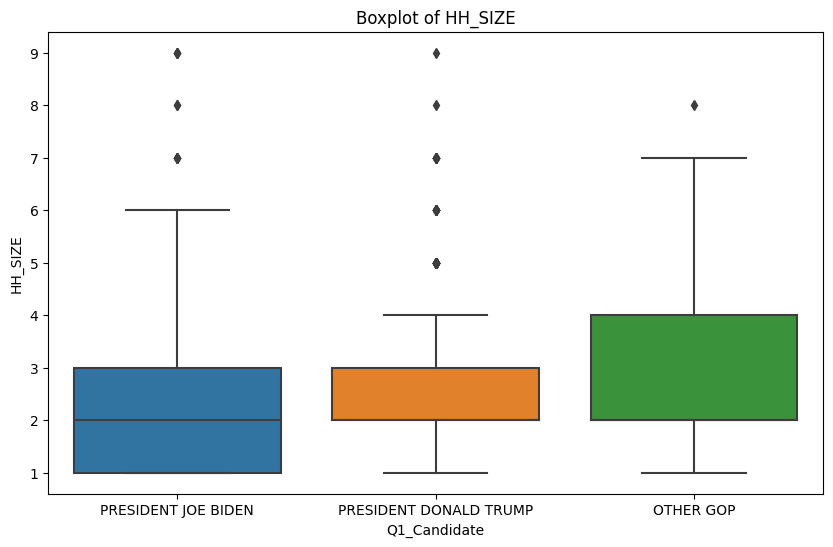

In [7]:
columns_to_plot = ["HH_SIZE"]

plot_outliers(survey_df, columns_to_plot, "Q1_Candidate")

In [8]:
def outlier_detection_single_column(survey_df, column_name, target_column=None, remove_by='none', threshold=1):
    original_df = survey_df.copy()
    
    if target_column:
        # Initialize DataFrame to store filtered rows
        filtered_df = pd.DataFrame()
        removed_df = pd.DataFrame()
        
        for target_value in original_df[target_column].unique():
            sub_df = original_df[original_df[target_column] == target_value]
            sub_filtered_df, sub_removed_df, _ = outlier_detection_single_column(sub_df, column_name, remove_by=remove_by, threshold=threshold)
            
            filtered_df = pd.concat([filtered_df, sub_filtered_df])
            removed_df = pd.concat([removed_df, sub_removed_df])
        
        # Sort by index to maintain original order
        filtered_df.sort_index(inplace=True)
        removed_df.sort_index(inplace=True)
        
        return filtered_df, removed_df, None  # Return None for results as it's not used in this block

    total_original_rows = len(original_df)

    if np.issubdtype(original_df[column_name].dtype, np.number):
        transformer = RobustScaler()
    else:
        original_df[column_name] = original_df[column_name].astype(str)
        transformer = OneHotEncoder(handle_unknown='ignore')

    X_col = transformer.fit_transform(original_df[[column_name]])

    models = {
        'IsolationForest': IsolationForest(contamination=0.1),
        'LocalOutlierFactor': LocalOutlierFactor(contamination=0.1),
        'OneClassSVM': OneClassSVM(nu=0.1)
    }

    results = {}
    for name, model in models.items():
        y_pred = model.fit_predict(X_col)
        y_pred = [1 if x == -1 else 0 for x in y_pred]
        results[name] = y_pred

    original_df['consensus'] = np.sum(list(results.values()), axis=0)

    if remove_by == 'consensus':
        removed_df = original_df[original_df['consensus'] >= threshold]
        filtered_df = original_df[original_df['consensus'] < threshold]
    elif remove_by in models.keys():
        removed_df = original_df[np.array(results[remove_by]) != 0]
        filtered_df = original_df[np.array(results[remove_by]) == 0]
    else:
        removed_df = pd.DataFrame()
        filtered_df = original_df.copy()

    initial_count = len(original_df)
    final_count = len(filtered_df)
    removed_count = initial_count - final_count

    if removed_count > 0:
        removed_percentage = 100 * removed_count / initial_count
        print(f"Removed {removed_percentage:.2f}% of values from column {column_name}.")

    return filtered_df.drop(columns=['consensus'], errors='ignore'), removed_df, results

#survey_df, removed_df, results = outlier_detection_single_column(survey_df, 'HH_SIZE',target_column=None, remove_by="consensus", threshold=1)

#removed_df.head(), removed_df.shape

In [9]:
#survey_df, removed_df, results = outlier_detection_single_column(survey_df, 'TOD_PRES_R_2016_PREC',target_column=None, remove_by="consensus", threshold=1)


In [10]:
#removed_df.shape, survey_df.shape

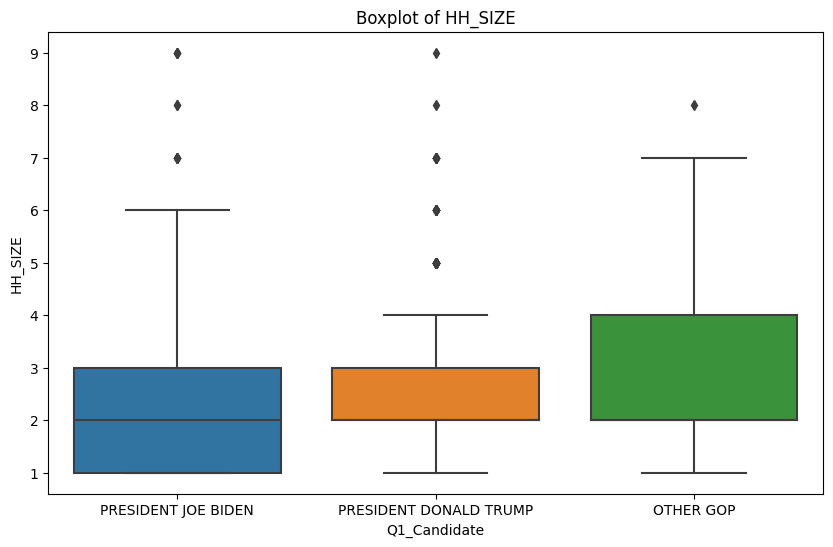

In [11]:
plot_outliers(survey_df, columns_to_plot, "Q1_Candidate")

## Counting votes + Interaction Terms

In [12]:
from itertools import groupby
from itertools import combinations

def create_interaction_terms(df, combinations, interaction_type='cat'):
    for combination in combinations:
        # Create an interaction term name dynamically based on the number of features involved
        interaction_term_name = "_".join(combination) + "_interaction"

        if interaction_type == 'cat':
            # Create the categorical interaction term
            df[interaction_term_name] = df[list(combination)].astype(str).apply(lambda x: "_".join(x), axis=1)
            
        elif interaction_type == 'num':
            # Create the numerical interaction term
            df[interaction_term_name] = df[list(combination)].apply(lambda x: x.prod(), axis=1)

    return df

def feature_engineering_voting_data(survey_df, columns_to_use, interaction_type='cat'):

    # Define the vote types
    democrat_votes = ['D', 'M', 'Z']
    republican_votes = ['R', 'P', 'X']
    early_votes = ['E', 'M', 'P']
    absentee_votes = ['A', 'Z', 'X']

    # Interaction terms for 2020
   # survey_df['interaction_mult_2020'] = survey_df['CNSUS_PCTW'] * survey_df['TOD_PRES_R_2020_PREC']
  #  survey_df['interaction_div_2020'] = survey_df['CNSUS_PCTW'] / survey_df['TOD_PRES_R_2020_PREC']
   # survey_df['interaction_add_2020'] = survey_df['CNSUS_PCTW'] + survey_df['TOD_PRES_R_2020_PREC']

    # Interaction terms for 2016
  #  survey_df['interaction_mult_2016'] = survey_df['CNSUS_PCTW'] * survey_df['TOD_PRES_R_2016_PREC']
  #  survey_df['interaction_div_2016'] = survey_df['CNSUS_PCTW'] / survey_df['TOD_PRES_R_2016_PREC']
  #  survey_df['interaction_add_2016'] = survey_df['CNSUS_PCTW'] + survey_df['TOD_PRES_R_2016_PREC']

    # Combined interaction terms
   # survey_df['interaction_mult_combined'] = (survey_df['TOD_PRES_R_2016_PREC'] + survey_df['TOD_PRES_R_2020_PREC']) * survey_df['CNSUS_PCTW']

    # Delta interaction term
    survey_df['interaction_mult_delta'] = (survey_df['TOD_PRES_R_2020_PREC'] - survey_df['TOD_PRES_R_2016_PREC']) * survey_df['CNSUS_PCTW']

    # Extend the list of columns to use in the model
    columns_to_use.extend([
      #   'interaction_div_2020',
      #   'interaction_div_2016',  
         'interaction_mult_delta',
       #  'interaction_mult_2020',
       #  'interaction_mult_2016'
    ])

    # Interaction terms for 2020 with respect to Democratic turnout
   # survey_df['interaction_mult_D_2020'] = survey_df['CNSUS_PCTB'] * survey_df['TOD_PRES_D_2020_PREC']
    survey_df['interaction_div_D_2020'] = survey_df['CNSUS_PCTB'] / survey_df['TOD_PRES_D_2020_PREC']
   # survey_df['interaction_add_D_2020'] = survey_df['CNSUS_PCTB'] + survey_df['TOD_PRES_D_2020_PREC']

    # Interaction terms for 2016 with respect to Democratic turnout
   # survey_df['interaction_mult_D_2016'] = survey_df['CNSUS_PCTB'] * survey_df['TOD_PRES_D_2016_PREC']
    survey_df['interaction_div_D_2016'] = survey_df['CNSUS_PCTB'] / survey_df['TOD_PRES_D_2016_PREC']
   # survey_df['interaction_add_D_2016'] = survey_df['CNSUS_PCTB'] + survey_df['TOD_PRES_D_2016_PREC']

    # Combined interaction terms for Democratic turnout
    #survey_df['interaction_mult_D_combined'] = (survey_df['TOD_PRES_D_2016_PREC'] + survey_df['TOD_PRES_D_2020_PREC']) * survey_df['CNSUS_PCTB']

    # Delta interaction term for Democratic turnout
    survey_df['interaction_mult_D_delta'] = (survey_df['TOD_PRES_D_2020_PREC'] - survey_df['TOD_PRES_D_2016_PREC']) * survey_df['CNSUS_PCTB']

    # Extend the list of columns to use in the model
    columns_to_use.extend([
         'interaction_div_D_2020',
        'interaction_div_D_2016', 
        'interaction_mult_D_delta'
    ])

    survey_df['Years_Voted_Democrat'] = survey_df[['VTR_PPP04', 'VTR_PPP08', 'VTR_PPP12', 'VTR_PPP16', 'VTR_PPP20']].apply(lambda x: sum(x.isin(['D', 'M', 'Z'])), axis=1)
    survey_df['Years_Voted_Republican'] = survey_df[['VTR_PPP04', 'VTR_PPP08', 'VTR_PPP12', 'VTR_PPP16', 'VTR_PPP20']].apply(lambda x: sum(x.isin(['R', 'P', 'X'])), axis=1)

    columns_to_use.extend(['Years_Voted_Democrat', 'Years_Voted_Republican'])


    #survey_df['Years_Absentee_Democrat'] = survey_df[['VTR_PPP04', 'VTR_PPP08', 'VTR_PPP12', 'VTR_PPP16', 'VTR_PPP20']].apply(lambda x: sum(x.isin(['Z'])), axis=1)
    survey_df['Years_Early_Democrat'] = survey_df[['VTR_PPP04', 'VTR_PPP08', 'VTR_PPP12', 'VTR_PPP16', 'VTR_PPP20']].apply(lambda x: sum(x.isin(['M'])), axis=1)
   # survey_df['Years_Absentee_Republican'] = survey_df[['VTR_PPP04', 'VTR_PPP08', 'VTR_PPP12', 'VTR_PPP16', 'VTR_PPP20']].apply(lambda x: sum(x.isin(['X'])), axis=1)
    survey_df['Years_Early_Republican'] = survey_df[['VTR_PPP04', 'VTR_PPP08', 'VTR_PPP12', 'VTR_PPP16', 'VTR_PPP20']].apply(lambda x: sum(x.isin(['P'])), axis=1)

    # 'Years_Absentee_Democrat', 'Years_Absentee_Republican',

    columns_to_use.extend(['Years_Early_Democrat', 'Years_Early_Republican'])

  #  primary_columns = ['VTR_PRI06', 'VTR_PRI10', 'VTR_PRI14', 'VTR_PRI16', 'VTR_PRI18', 'VTR_PRI20', 'VTR_PRI21', 'VTR_PRI22']
   # survey_df['Years_Voted_Democrat_Primaries'] = survey_df[primary_columns].apply(lambda x: sum(x.isin(['D', 'M', 'Z'])), axis=1)
   # survey_df['Years_Voted_Republican_Primaries'] = survey_df[primary_columns].apply(lambda x: sum(x.isin(['R', 'P', 'X'])), axis=1)
   # survey_df['Years_Early_Democrat_Primaries'] = survey_df[primary_columns].apply(lambda x: sum(x.isin(['M'])), axis=1)
   # survey_df['Years_Early_Republican_Primaries'] = survey_df[primary_columns].apply(lambda x: sum(x.isin(['P'])), axis=1)

   # columns_to_use.extend(['Years_Voted_Democrat_Primaries', 'Years_Voted_Republican_Primaries', 'Years_Early_Democrat_Primaries', 'Years_Early_Republican_Primaries'])

  #  for col in primary_columns:
  #      columns_to_use.remove(col)
    
    # function to count specific vote types
    def count_votes(vote_counts, vote_types):
        return sum(vote_counts.get(vote_type, 0) for vote_type in vote_types)

    # function to count longest streak for a party
    def longest_streak(votes, party_votes):
        streaks = [sum(1 for _ in g) for k, g in groupby(votes) if k in party_votes]
        return max(streaks) if streaks else 0

    # count early and absentee votes
    survey_df['count_Early'] = survey_df.filter(like='VTR_GEN').apply(lambda row: count_votes(row.value_counts(), early_votes), axis=1)
    survey_df['count_Absentee'] = survey_df.filter(like='VTR_GEN').apply(lambda row: count_votes(row.value_counts(), absentee_votes), axis=1)
    columns_to_use.extend(['count_Early', 'count_Absentee'])



    for prefix in ['VTR_GEN', 'VTR_PPP', 'VTR_PRI']:
        survey_df[f'count_D_{prefix}'] = survey_df.filter(like=prefix).apply(lambda row: count_votes(row.value_counts(), democrat_votes), axis=1)
        survey_df[f'count_R_{prefix}'] = survey_df.filter(like=prefix).apply(lambda row: count_votes(row.value_counts(), republican_votes), axis=1)
        columns_to_use.extend([f'count_R_{prefix}'])
        columns_to_use.extend([f'count_D_{prefix}'])
           #[f'count_D_{prefix}', f'count_R_{prefix}'])

        # Count longest streak of consistent voting for each party
       # survey_df[f'longest_streak_D_{prefix}'] = survey_df.filter(like=prefix).apply(lambda row: longest_streak(row.tolist(), democrat_votes), axis=1)
       # survey_df[f'longest_streak_R_{prefix}'] = survey_df.filter(like=prefix).apply(lambda row: longest_streak(row.tolist(), republican_votes), axis=1)
        #columns_to_use.extend([f'longest_streak_D_{prefix}', f'longest_streak_R_{prefix}'])

    #survey_df['recent_party_2022'] = survey_df['VTR_GEN22'].apply(lambda x: 'D' if x in democrat_votes else ('R' if x in republican_votes else 'Other'))
    #survey_df['recent_party_2020'] = survey_df['VTR_GEN18'].apply(lambda x: 'D' if x in democrat_votes else ('R' if x in republican_votes else 'Other'))
   # columns_to_use.extend(['recent_party_2022'])

    survey_df['total_votes'] = survey_df.filter(like='VTR_').apply(lambda row: sum(row != 'N'), axis=1)
    columns_to_use.append('total_votes')
    #columns_to_use.remove("count_R_VTR_GEN")

    #feature_combinations = [
    #['PRFL_LIBERAL_NEWS', 'PRFL_IMMIGRATION_REFORM'] ]

    #survey_df = create_interaction_terms(survey_df, feature_combinations, interaction_type)
    
    # Add the new interaction term columns to your columns_to_use list
    #new_columns = ["_".join(combination) + "_interaction" for combination in feature_combinations]
   # columns_to_use.extend(new_columns)

    # drop count_D_VTR_GEN
   # columns_to_use.remove('count_D_VTR_GEN')

    
    return survey_df, columns_to_use



survey_df, columns_to_use = feature_engineering_voting_data(survey_df, columns_to_use)

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

def decision_tree_binning(df, target_var, feature_var, max_depth=3, remove_original=False, colums_to_use=None):
    X = df[[feature_var]].copy()
    y = df[target_var].copy()
    
    le = None  # Initialize LabelEncoder to None
    
    if np.issubdtype(X[feature_var].dtype, np.object_):
        le = LabelEncoder()
        X[feature_var] = le.fit_transform(X[feature_var])
        
    if np.issubdtype(y.dtype, np.object_):
        le_target = LabelEncoder()
        y = le_target.fit_transform(y)
    
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X, y)
    
    unique_values = np.sort(X[feature_var].unique())
    tree_values = tree.tree_.threshold
    bins = np.unique([val for val in tree_values if val != -2])
    
    if le:
        bins = np.round(bins).astype(int)
        bins = [b for b in bins if b in le.classes_]
        bins = le.inverse_transform(bins)
    
    if len(bins) == 0:
        raise ValueError("No valid bins found. Decision Tree may not have split the feature.")
    
    bins = np.concatenate(([unique_values[0] - 1], bins, [unique_values[-1] + 1]))
    bin_labels = range(len(bins) - 1)
    
    df[f'{feature_var}_bin'] = pd.cut(df[feature_var], bins=bins, labels=bin_labels, include_lowest=True)
    
    # Remove the original column if specified
    if remove_original:
        df.drop(columns=[feature_var], inplace=True)
        # remove the column in columns_to_use
        columns_to_use.remove(feature_var)
    
    plt.figure(figsize=(12, 8))
    plot_tree(tree, filled=True, feature_names=[feature_var])
    plt.title(f"Decision Tree for Optimal Binning of {feature_var}")
    plt.show()
    
    return df

#trgt = "Q1_Candidate"
#feat = "ZIP"
#survey_df = decision_tree_binning(survey_df, trgt, feat, max_depth=4, remove_original=True, colums_to_use=columns_to_use)


In [14]:
# check dtypes of total_votes
#print(survey_df.total_votes.dtypes)

def count_switches(row):
    switch_count = 0
    prev_vote = None
    for vote in row:
        if prev_vote in democrat_votes and vote in republican_votes:
            switch_count += 1
        elif prev_vote in republican_votes and vote in democrat_votes:
            switch_count += 1
        prev_vote = vote
    return switch_count

survey_df['count_switches'] = survey_df.filter(like='VTR_GEN').apply(count_switches, axis=1)


## Adding splitting out TOD

In [15]:
#survey_df = survey_df[columns_to_use]

# 'TOD_PRES_DIFF_2016_PREC','TOD_PRES_DIFF_2016'

#split_cols = ['TOD_PRES_DIFF_2020_PREC']
#for col in split_cols:
    #print(survey_df[col].dtype)
    #survey_df[col + '_num'] = survey_df[col].str.extract('(\d+)').astype('float')
    #survey_df[col + '_party'] = survey_df[col].str.extract('([RD])')
    # append these new columsn to "features_to_use"
   # features_to_use.append(col + '_num')
   # features_to_use.append(col + '_party')
   # columns_to_use.append(col + '_num')
   # columns_to_use.append(col + '_party')
    #columns_to_use.remove('TOD_PRES_DIFF_2020_PREC')

# convert split_cols to int


#survey_df[split_cols] = survey_df[split_cols].astype(int)

# drop the split_cols
#survey_df.drop(columns=split_cols, inplace=True)

freq_cols = ['ZIP', 'STATE', 'AI_COUNTY_NAME']

cols_tried = ["LIFESTAGE_CLUSTER", 'COUNTY_ST']

for col in freq_cols:
    freq_map = survey_df[col].value_counts(normalize=True)
    survey_df[col + '_freq'] = survey_df[col].map(freq_map)
    columns_to_use.append(col + '_freq')



In [16]:
survey_df = survey_df[columns_to_use]

label_encoder = LabelEncoder()
survey_df['Q1_Candidate'] = label_encoder.fit_transform(survey_df['Q1_Candidate'].astype(str))

# print the class names for the target variable and corresponding labels
print(label_encoder.classes_)
print(label_encoder.transform(label_encoder.classes_))
print(label_encoder.inverse_transform([0, 1, 2]))

categorical_columns = survey_df.select_dtypes(include=['object', 'category']).columns.tolist()

label_encoders = {}
for categorical_col in categorical_columns:
    survey_df.loc[:, categorical_col] = survey_df[categorical_col].fillna('missing').astype(str)
    
    le = LabelEncoder()
    survey_df[categorical_col] = le.fit_transform(survey_df[categorical_col])
    label_encoders[categorical_col] = le


['OTHER GOP' 'PRESIDENT DONALD TRUMP' 'PRESIDENT JOE BIDEN']
[0 1 2]
['OTHER GOP' 'PRESIDENT DONALD TRUMP' 'PRESIDENT JOE BIDEN']


In [17]:
def fit_outlier_detection(X_train, column_names, remove_by='consensus', threshold=1):
    fitted_models_dict = {}
    transformer_dict = {}
    
    for column_name in column_names:
        transformer = RobustScaler() if np.issubdtype(X_train[column_name].dtype, np.number) else OneHotEncoder(handle_unknown='ignore')
        X_col = transformer.fit_transform(X_train[[column_name]])

        models = {
            'IsolationForest': IsolationForest(contamination=0.1),
            'LocalOutlierFactor': LocalOutlierFactor(contamination=0.1, novelty=True),
            'OneClassSVM': OneClassSVM(nu=0.1)
        }

        fitted_models = {}
        for name, model in models.items():
            fitted_models[name] = model.fit(X_col)

        fitted_models_dict[column_name] = fitted_models
        transformer_dict[column_name] = transformer

    return fitted_models_dict, transformer_dict

def apply_outlier_detection(X, fitted_models_dict, transformer_dict, column_names, remove_by='consensus', threshold=1):
    outlier_indices = set()
    
    for column_name in column_names:
        fitted_models = fitted_models_dict[column_name]
        transformer = transformer_dict[column_name]
        X_col = transformer.transform(X[[column_name]])

        results = {}
        for name, model in fitted_models.items():
            y_pred = model.predict(X_col)
            y_pred = [1 if x == -1 else 0 for x in y_pred]
            results[name] = y_pred

        consensus = np.sum(list(results.values()), axis=0)
        current_outliers = np.where(consensus >= threshold)[0]
        outlier_indices.update(current_outliers)

    return X.drop(X.index[list(outlier_indices)])

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.base import BaseEstimator,TransformerMixin
from typing import List
from sklearn.cluster import KMeans
from category_encoders import TargetEncoder

class TargetMeanEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.mean_map = {}
        
    def fit(self, X, y):
        X_copy = X.copy()
        X_copy['target'] = y
        for col in self.columns:
            self.mean_map[col] = X_copy.groupby(col)['target'].mean()
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        for col in self.columns:
            X_copy[col] = X_copy[col].map(self.mean_map[col])
        return X_copy

def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model on various metrics and return a dictionary of results.
    """
    y_pred = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }

def plot_confusion_matrix(y_true, y_pred, title=''):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()#

def plot_logistic_regression_coefficients(model: BaseEstimator, feature_names: List[str], 
                                                      title: str = 'Logistic Regression Coefficients'):
    
    # Extract coefficients from the logistic regression model
    coef = model.coef_[0]
    
    # Sort coefficients and feature names by the absolute values of coefficients
    sorted_indices = np.argsort(np.abs(coef))[::-1]
    sorted_coef = coef[sorted_indices]
    sorted_feature_names = [feature_names[i] for i in sorted_indices]
    
    # Create DataFrame for Plotly
    df = pd.DataFrame({
        'Feature': sorted_feature_names,
        'Coefficient': sorted_coef
    })
    
    # Create interactive vertical bar chart
    fig = px.bar(df, y='Feature', x='Coefficient', orientation='h', text='Coefficient')
    
    # Customize appearance
    fig.update_layout(
        title=title,
        xaxis_title='Coefficient Value',
        yaxis_title='Feature',
        yaxis_categoryorder='total ascending'
    )
    
    # Show the plot
    fig.show()

def plot_feature_importance(model: BaseEstimator, feature_names: List[str], 
                                        title: str = 'Feature Importances', n_features: int = None):
    importances = None
    
    # Handle different types of models
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])
    else:
        print(f"{title} does not support feature importances.")
        return

    sorted_indices = np.argsort(importances)[::-1]
    if n_features:
        sorted_indices = sorted_indices[:n_features]
    sorted_importances = importances[sorted_indices]
    sorted_feature_names = [feature_names[i] for i in sorted_indices]
    
    df = pd.DataFrame({
        'Feature': sorted_feature_names,
        'Importance': sorted_importances
    })
    
    fig = px.bar(df, y='Feature', x='Importance', orientation='h', text='Importance')
    
    fig.update_layout(
        title=title,
        xaxis_title='Importance Value',
        yaxis_title='Feature',
        yaxis_categoryorder='total ascending'
    )
    
    fig.show()

def plot_svm_feature_importance(model, feature_names, title='SVM - Feature Importance'):
    """
    Plot feature importance for SVM. Note that this works well for linear SVM.
    For non-linear SVM, the interpretation is not straightforward.
    """
    try:
        # If the SVM is linear, we can directly get the coefficients
        coef = model.coef_[0]
    except AttributeError:
        print("The model does not expose 'coef_' attribute. This method works only for linear kernels.")
        return

    # Sort coefficients and feature names by the absolute values of coefficients
    sorted_indices = np.argsort(np.abs(coef))[::-1]
    sorted_coef = coef[sorted_indices]
    sorted_feature_names = [feature_names[i] for i in sorted_indices]
    
    # Create DataFrame for plotting
    df = pd.DataFrame({
        'Feature': sorted_feature_names,
        'Coefficient': sorted_coef
    })
    
    # Plotting
    plt.figure(figsize=(10, 8))
    plt.barh(df['Feature'], df['Coefficient'], align='center')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title(title)
    plt.show()

class KMeansTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        self.kmeans = KMeans(n_clusters=self.n_clusters, n_init='auto')
    
    def fit(self, X, y=None):
        self.kmeans.fit(X)
        return self
    
    def transform(self, X):
        labels = self.kmeans.predict(X)
        return np.c_[X, labels]


from category_encoders import TargetEncoder

def target_encode_columns(X_train, X_test, y_train, columns_to_encode):
    encoder = TargetEncoder()
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()
    encoder.fit(X_train[columns_to_encode], y_train)
    X_train_encoded[columns_to_encode] = encoder.transform(X_train[columns_to_encode])
    X_test_encoded[columns_to_encode] = encoder.transform(X_test[columns_to_encode])
    
    return X_train_encoded, X_test_encoded

def prepare_and_fit_model(df, target_col, model_type='All', feature_importance=False, 
                          scale_data=False, evaluate_models=False, use_grid_search=False, 
                          feature_engineering=None, add_stats=False):
    print("Starting data preparation...")

    df = df.drop(columns=['Unnamed: 0', "RECORD_ID"], errors='ignore')
    # Identify the prefix of the chosen target column
    target_prefix = "_".join(target_col.split("_")[:-1])
    
    # Drop all other questionnaire columns
    other_q_cols = [col for col in df.columns if col.startswith("Q") and not col.startswith(target_prefix)]
    df = df.drop(columns=other_q_cols)
    
    if not np.issubdtype(df[target_col].dtype, np.number):
        le = LabelEncoder()
        df[target_col] = le.fit_transform(df[target_col])
        # print codes of the target column after encoding
        print(le.classes_)

    num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_features = df.select_dtypes(include=['object']).columns.tolist()

    if target_col in num_features: 
        num_features.remove(target_col)
    if target_col in cat_features: 
        cat_features.remove(target_col)

    num_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))])
    cat_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])

    
    kmeans_n_clusters = 8
    feature_engineering_steps = []
    pcs = 7

    if feature_engineering == 'KMeans':
        feature_engineering_steps.append(('kmeans', KMeansTransformer(n_clusters=kmeans_n_clusters)))
    elif feature_engineering == 'PCA':
        feature_engineering_steps.append(('pca', PCA(n_components=pcs, random_state=42)))  
    elif feature_engineering == 'BOTH':
        feature_engineering_steps.append(('kmeans', KMeansTransformer(n_clusters=kmeans_n_clusters)))
        feature_engineering_steps.append(('pca', PCA(n_components=pcs, random_state=42)))  

    if scale_data:
        num_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ] + feature_engineering_steps)
    else:
        num_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean'))
        ] + feature_engineering_steps)

    # Your existing ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_transformer, num_features),
            ('cat', cat_transformer, cat_features)
        ])

    models = {}
    model_types_to_fit = []

    if 'RF' in model_type or 'All' in model_type: 
        model_types_to_fit.append('RF')
    if 'XGBoost' in model_type or 'All' in model_type: 
        model_types_to_fit.append('XGBoost')
    if 'LogisticRegression' in model_type or 'All' in model_type: 
        model_types_to_fit.append('LogisticRegression')
    if 'SVM' in model_type or 'All' in model_type: 
        model_types_to_fit.append('SVM')
    if 'GBC' in model_type or 'All' in model_type:  
        model_types_to_fit.append('GBC')
    if 'Ensemble' in model_type or 'All' in model_type: 
        model_types_to_fit.append('Ensemble')
    if 'Stacked' in model_type or 'All' in model_type: 
        model_types_to_fit.append('Stacked')

    print("Starting model training...")
    evaluation_results = {}

    X = df.drop(columns=[target_col])
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(type(X_train))
    print(type(X_test))
    if add_stats:
        # Temporarily add the target column back to X_train and X_test for the merge
        X_train_temp = X_train.copy()
        X_train_temp[y_train.name] = y_train

        X_test_temp = X_test.copy()
        X_test_temp[y_train.name] = y_test

        # Calculate aggregate statistics using y_train.name as the groupby column
        agg_stats = X_train_temp.groupby(y_train.name)['TOD_PRES_R_2020_PREC', 'TOD_PRES_R_2016_PREC', "AGE", "HH_SIZE"].agg(['mean', 'std', 'min', 'max']).reset_index()

        # Rename columns
        agg_stats.columns = [y_train.name, 'TOD_PRES_R_2020_PREC_mean', 'TOD_PRES_R_2020_PREC_std', 'TOD_PRES_R_2020_PREC_min', 'TOD_PRES_R_2020_PREC_max',
                            'TOD_PRES_R_2016_PREC_mean', 'TOD_PRES_R_2016_PREC_std', 'TOD_PRES_R_2016_PREC_min', 'TOD_PRES_R_2016_PREC_max',
                            'AGE_mean', 'AGE_std', 'AGE_min', 'AGE_max',
                            'HH_SIZE_mean', 'HH_SIZE_std', 'HH_SIZE_min', 'HH_SIZE_max']

        # Merge these statistics back into the temporary training and test sets
        X_train_temp = pd.merge(X_train_temp, agg_stats, on=y_train.name, how='left')
        X_test_temp = pd.merge(X_test_temp, agg_stats, on=y_train.name, how='left')

        # Remove the temporarily added target column to get the final X_train and X_test
        X_train = X_train_temp.drop(columns=[y_train.name])
        X_test = X_test_temp.drop(columns=[y_train.name])

    # Initialize an empty dictionary to store the trained models
    evaluation_results = {}
    classification_reports_dict = {}
    best_params_dict = {}
    # Loop through the specified models to fit
    for model_type in tqdm(model_types_to_fit):
        clf = None  # Reset classifier

        if model_type == 'RF':
            clf = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', RandomForestClassifier(random_state=42))])
        elif model_type == 'XGBoost':
            clf = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', XGBClassifier(random_state=42))])
        elif model_type == 'GBC':
            clf = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', GradientBoostingClassifier(random_state=42))])
        elif model_type == 'LogisticRegression':
            clf = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42))])
        elif model_type == 'SVM':
            clf = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier',  SVC(C=1.0, kernel='rbf', random_state=42))])
        elif model_type == 'Ensemble':
            clf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', VotingClassifier(estimators=[
                                  ('RF', RandomForestClassifier(random_state=42)),
                                  ('XGBoost', XGBClassifier(random_state=42)),
                                  ('LogisticRegression', LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)),
                                  ('SVM', SVC(C=1.0, kernel='rbf', random_state=42, probability=True)),
                                  ('GBC', GradientBoostingClassifier(random_state=42))],
                              voting='soft'))])
        elif model_type == 'Stacked':
             clf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', StackingClassifier(estimators=[
                                  ('RF', RandomForestClassifier(random_state=42)),
                                  ('XGBoost', XGBClassifier(random_state=42)),
                                  ('LogisticRegression', LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)),
                                  ('SVM', SVC(C=1.0, kernel='linear',random_state=42,probability=True)),
                                  ('GBC', GradientBoostingClassifier(random_state=42))],
                              final_estimator=LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)))])
        
        best_params_dict = {}
        if clf:
            if use_grid_search:
                param_grids = {
                                'RF': {
                                    'classifier__n_estimators': [50, 100, 200, 300],
                                    'classifier__max_depth': [None, 10, 20, 30, 40],
                                    'classifier__min_samples_split': [2, 5, 10, 15],
                                    'classifier__min_samples_leaf': [1, 2, 5]
                                },
                                'XGBoost': {
                                    'classifier__n_estimators': [50, 100, 200, 300],
                                    'classifier__learning_rate': [0.001, 0.01, 0.1, 0.2],
                                    'classifier__max_depth': [3, 4, 5, 6],
                                    'classifier__subsample': [0.7, 0.8, 0.9, 1.0],
                                    'classifier__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
                                },
                                'GBC': {
                                    'classifier__n_estimators': [50, 100, 200, 300],
                                    'classifier__learning_rate': [0.001, 0.01, 0.1, 0.2],
                                    'classifier__max_depth': [3, 4, 5, 6],
                                    'classifier__min_samples_split': [2, 3, 4, 5],
                                    'classifier__min_samples_leaf': [1, 2, 3, 4]
                                },
                                'LogisticRegression': {
                                    'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                                    'classifier__C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10],
                                    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                                },
                                'SVM': {
                                    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                                    'classifier__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
                                    'classifier__gamma': ['scale', 'auto']
                                }
                                        }

                
                grid_search = GridSearchCV(clf, param_grids[model_type], cv=5, verbose=3, n_jobs=-1)
                grid_search.fit(X_train, y_train)
                clf = grid_search.best_estimator_
                print(f"Best parameters for {model_type}: {grid_search.best_params_}")
                #if 'kmeans_cluster_label' not in num_features:
                  #  num_features.append('kmeans_cluster_label')

                best_params_dict[model_type] = grid_search.best_params_
                print(f"Best parameters for {model_type}: {grid_search.best_params_}")

                models[model_type] = clf  # the best estimator is already fitted
                print(f"{model_type} model trained.")
            else:
                clf.fit(X_train, y_train)
                models[model_type] = clf
                print(f"{model_type} model trained.")
                #print(clf.named_steps)
                transformed_X_train = clf.named_steps['preprocessor'].transform(X_train)
                print("Shape of transformed_X_train:", transformed_X_train.shape)

                if feature_engineering in ['PCA', 'BOTH']:
                    transformed_X_train_df = pd.DataFrame(transformed_X_train, columns=['PCA1', 'PCA2', "PCA3", "PCA4", "PCA5", "PCA6", "PCA7"])
                elif feature_engineering in ['KMeans']:
                    transformed_X_train_df = pd.DataFrame(transformed_X_train, columns=['kmeans_cluster'])

                transformed_X_train_df['target_class'] = y_train.reset_index(drop=True)

            if evaluate_models:
                eval_metrics = evaluate_model(clf, X_test, y_test)
                evaluation_results[model_type] = eval_metrics
                print(f"Evaluation metrics for {model_type}: {eval_metrics}")

                y_pred = clf.predict(X_test)
                report = classification_report(y_test, y_pred, output_dict=True)
                classification_reports_dict[model_type] = report
                report_str = classification_report(y_test, y_pred)
                print(f"Classification Report for {model_type}:\n{report}")

            if feature_importance:
                feature_names = num_features + cat_features
                feature_names.append('kmeans_cluster')  # Add the new KMeans feature name
                if model_type in ['RF', 'XGBoost', 'GBC']:
                    plot_feature_importance(clf.named_steps['classifier'], feature_names, title=f'{model_type} - Feature Importance')
                elif model_type == 'LogisticRegression':
                    plot_logistic_regression_coefficients(clf.named_steps['classifier'], feature_names, title=f'{model_type} - Coefficients')
                elif model_type == 'SVM':
                    plot_svm_feature_importance(clf.named_steps['classifier'], feature_names, title=f'{model_type} - Feature Importance')
                elif model_type in ['Ensemble', 'Stacked']:
                    # Handle ensemble feature importance here (either aggregate or per-model)
                    print("Feature importance for ensembles needs special handling.")
                else:
                    print(f"Feature importance not available for {model_type}")


    print("Model training complete.")
    if evaluate_models:
        return models, evaluation_results, classification_reports_dict, best_params_dict, transformed_X_train_df , X_train, y_train, X_test, y_test
    else:
        return models, transformed_X_train_df

In [19]:
import os
import json
def get_next_experiment_id(log_file):
    if os.path.exists(log_file) and os.path.getsize(log_file) > 0:
        try:
            experiment_log = pd.read_csv(log_file)
            last_exp_id = experiment_log['exp_id'].iloc[-1]
            next_exp_id = f"experiment_{int(last_exp_id.split('_')[1]) + 1}"
            print(f"Next exp_id generated: {next_exp_id}")  # Debug print
        except pd.errors.EmptyDataError:
            next_exp_id = "experiment_1"
    else:
        next_exp_id = "experiment_1"
    return next_exp_id

def log_experiment_results_csv(log_file, exp_id=None, evaluation_results=None, notes={}):
    if exp_id is None:
        exp_id = get_next_experiment_id(log_file)
        
    if os.path.exists(log_file) and os.path.getsize(log_file) > 0:
        try:
            experiment_log = pd.read_csv(log_file)
        except pd.errors.EmptyDataError:
            experiment_log = pd.DataFrame(columns=['exp_id', 'evaluation_results', 'notes'])
    else:
        experiment_log = pd.DataFrame(columns=['exp_id', 'evaluation_results', 'notes'])
        
    new_row = {'exp_id': exp_id, 'evaluation_results': str(evaluation_results), 'notes': str(notes)}
    experiment_log = experiment_log.append(new_row, ignore_index=True)
    
    experiment_log.to_csv(log_file, index=False)

log_file = "experiment_logs.csv"

model_list = ["RF", "XGBoost", "LogisticRegression", "SVM", "GBC"]
["RF", "XGBoost", "LogisticRegression", "SVM", "GBC", "Ensemble", "Stacked"]

#df_survey_processed = preprocessor_survey.run_preprocessing_pipeline(skip_preprocess_dataframe=False, drop_converted_cols=True, use_frequency_encoding=True)
models, evaluation_results, class_report, best_params,transformed_X_train_df, X_train, y_train, X_test, y_test = prepare_and_fit_model(
    survey_df, 'Q1_Candidate', model_type="All", feature_importance=True, 
    scale_data=True, evaluate_models=True, use_grid_search=False, 
    feature_engineering="BOTH", add_stats=False
)

class_report_str = json.dumps(class_report, indent=4)

best_params_str = json.dumps(best_params, indent=4)


# Update your notes dictionary
notes = {
    "description": "Good SVM - Removed some features",
    "target_col": "Q1_Candidate",
    "columns_used": ", ".join(columns_to_use),
    "classification_report": class_report_str,
    "best_params": best_params_str 
}
log_experiment_results_csv(log_file,None, evaluation_results, notes)

Starting data preparation...
Starting model training...
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


  0%|          | 0/7 [00:00<?, ?it/s]

RF model trained.
Shape of transformed_X_train: (1079, 7)
Evaluation metrics for RF: {'Accuracy': 0.5148148148148148, 'Precision': 0.4940543111797663, 'Recall': 0.5148148148148148, 'F1 Score': 0.5020648601289993}
Classification Report for RF:
{'0': {'precision': 0.22, 'recall': 0.15942028985507245, 'f1-score': 0.1848739495798319, 'support': 69}, '1': {'precision': 0.4824561403508772, 'recall': 0.5612244897959183, 'f1-score': 0.5188679245283019, 'support': 98}, '2': {'precision': 0.6886792452830188, 'recall': 0.7087378640776699, 'f1-score': 0.6985645933014353, 'support': 103}, 'accuracy': 0.5148148148148148, 'macro avg': {'precision': 0.46371179521129874, 'recall': 0.4764608812428868, 'f1-score': 0.46743548913652305, 'support': 270}, 'weighted avg': {'precision': 0.4940543111797663, 'recall': 0.5148148148148148, 'f1-score': 0.5020648601289993, 'support': 270}}


 14%|█▍        | 1/7 [00:01<00:07,  1.18s/it]

XGBoost model trained.
Shape of transformed_X_train: (1079, 7)
Evaluation metrics for XGBoost: {'Accuracy': 0.5074074074074074, 'Precision': 0.5129089506172839, 'Recall': 0.5074074074074074, 'F1 Score': 0.509622826777566}
Classification Report for XGBoost:
{'0': {'precision': 0.2753623188405797, 'recall': 0.2753623188405797, 'f1-score': 0.2753623188405797, 'support': 69}, '1': {'precision': 0.4857142857142857, 'recall': 0.5204081632653061, 'f1-score': 0.5024630541871921, 'support': 98}, '2': {'precision': 0.6979166666666666, 'recall': 0.6504854368932039, 'f1-score': 0.6733668341708543, 'support': 103}, 'accuracy': 0.5074074074074074, 'macro avg': {'precision': 0.4863310904071773, 'recall': 0.48208530633302993, 'f1-score': 0.48373073573287534, 'support': 270}, 'weighted avg': {'precision': 0.5129089506172839, 'recall': 0.5074074074074074, 'f1-score': 0.509622826777566, 'support': 270}}


 29%|██▊       | 2/7 [00:02<00:06,  1.22s/it]

LogisticRegression model trained.
Shape of transformed_X_train: (1079, 7)
Evaluation metrics for LogisticRegression: {'Accuracy': 0.5814814814814815, 'Precision': 0.5146352492843722, 'Recall': 0.5814814814814815, 'F1 Score': 0.5153061215479258}
Classification Report for LogisticRegression:
{'0': {'precision': 0.25, 'recall': 0.028985507246376812, 'f1-score': 0.051948051948051945, 'support': 69}, '1': {'precision': 0.5135135135135135, 'recall': 0.7755102040816326, 'f1-score': 0.6178861788617885, 'support': 98}, '2': {'precision': 0.6929824561403509, 'recall': 0.7669902912621359, 'f1-score': 0.7281105990783411, 'support': 103}, 'accuracy': 0.5814814814814815, 'macro avg': {'precision': 0.48549865655128815, 'recall': 0.5238286675300484, 'f1-score': 0.4659816099627272, 'support': 270}, 'weighted avg': {'precision': 0.5146352492843722, 'recall': 0.5814814814814815, 'f1-score': 0.5153061215479258, 'support': 270}}


 57%|█████▋    | 4/7 [00:05<00:04,  1.47s/it]

SVM model trained.
Shape of transformed_X_train: (1079, 7)
Evaluation metrics for SVM: {'Accuracy': 0.6074074074074074, 'Precision': 0.6253345306862126, 'Recall': 0.6074074074074074, 'F1 Score': 0.5630107852794828}
Classification Report for SVM:
{'0': {'precision': 0.6428571428571429, 'recall': 0.13043478260869565, 'f1-score': 0.21686746987951808, 'support': 69}, '1': {'precision': 0.5374149659863946, 'recall': 0.8061224489795918, 'f1-score': 0.6448979591836734, 'support': 98}, '2': {'precision': 0.6972477064220184, 'recall': 0.7378640776699029, 'f1-score': 0.7169811320754718, 'support': 103}, 'accuracy': 0.6074074074074074, 'macro avg': {'precision': 0.6258399384218519, 'recall': 0.5581404364193968, 'f1-score': 0.5262488537128878, 'support': 270}, 'weighted avg': {'precision': 0.6253345306862126, 'recall': 0.6074074074074074, 'f1-score': 0.5630107852794828, 'support': 270}}
The model does not expose 'coef_' attribute. This method works only for linear kernels.
GBC model trained.
Shape

 86%|████████▌ | 6/7 [00:09<00:01,  1.71s/it]

Ensemble model trained.
Shape of transformed_X_train: (1079, 7)
Evaluation metrics for Ensemble: {'Accuracy': 0.5333333333333333, 'Precision': 0.5144451717034375, 'Recall': 0.5333333333333333, 'F1 Score': 0.5184091673784196}
Classification Report for Ensemble:
{'0': {'precision': 0.32558139534883723, 'recall': 0.2028985507246377, 'f1-score': 0.25, 'support': 69}, '1': {'precision': 0.4745762711864407, 'recall': 0.5714285714285714, 'f1-score': 0.5185185185185185, 'support': 98}, '2': {'precision': 0.6788990825688074, 'recall': 0.7184466019417476, 'f1-score': 0.6981132075471699, 'support': 103}, 'accuracy': 0.5333333333333333, 'macro avg': {'precision': 0.49301891636802847, 'recall': 0.4975912413649855, 'f1-score': 0.48887724202189614, 'support': 270}, 'weighted avg': {'precision': 0.5144451717034375, 'recall': 0.5333333333333333, 'f1-score': 0.5184091673784196, 'support': 270}}
Feature importance for ensembles needs special handling.


100%|██████████| 7/7 [00:17<00:00,  2.49s/it]

Stacked model trained.
Shape of transformed_X_train: (1079, 7)
Evaluation metrics for Stacked: {'Accuracy': 0.5703703703703704, 'Precision': 0.5314872866597004, 'Recall': 0.5703703703703704, 'F1 Score': 0.5207307095123707}
Classification Report for Stacked:
{'0': {'precision': 0.3333333333333333, 'recall': 0.07246376811594203, 'f1-score': 0.11904761904761905, 'support': 69}, '1': {'precision': 0.503448275862069, 'recall': 0.7448979591836735, 'f1-score': 0.6008230452674896, 'support': 98}, '2': {'precision': 0.6909090909090909, 'recall': 0.7378640776699029, 'f1-score': 0.7136150234741784, 'support': 103}, 'accuracy': 0.5703703703703704, 'macro avg': {'precision': 0.5092302333681644, 'recall': 0.5184086016565062, 'f1-score': 0.477828562596429, 'support': 270}, 'weighted avg': {'precision': 0.5314872866597004, 'recall': 0.5703703703703704, 'f1-score': 0.5207307095123707, 'support': 270}}
Feature importance for ensembles needs special handling.
Model training complete.
Next exp_id generate

In [20]:
import joblib

def save_models(models_dict, model_names, number):
    for name in model_names:
        model = models_dict.get(name)
        if model:
            joblib.dump(model, f'{name}_model_{number}.pkl')
        else:
            print(f"{name} model not found in the dictionary.")

#save_models(models, ['LogisticRegression'],"61_70_pca_7_k_8")

In [21]:
transformed_X_train_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,target_class
0,-0.578705,-0.675645,-0.413306,-2.426388,-0.716955,1.173391,-0.368135,2
1,0.076877,-0.061290,2.904896,0.417886,-1.788979,1.715090,-0.100682,1
2,3.472622,2.376391,1.819725,-0.214088,0.849410,-3.854885,0.320745,1
3,0.501538,-1.230294,-0.406338,-1.475873,-1.245313,1.091647,0.485955,2
4,0.026681,-0.652298,-1.734389,-0.082336,-1.461620,-0.986357,-2.671032,2


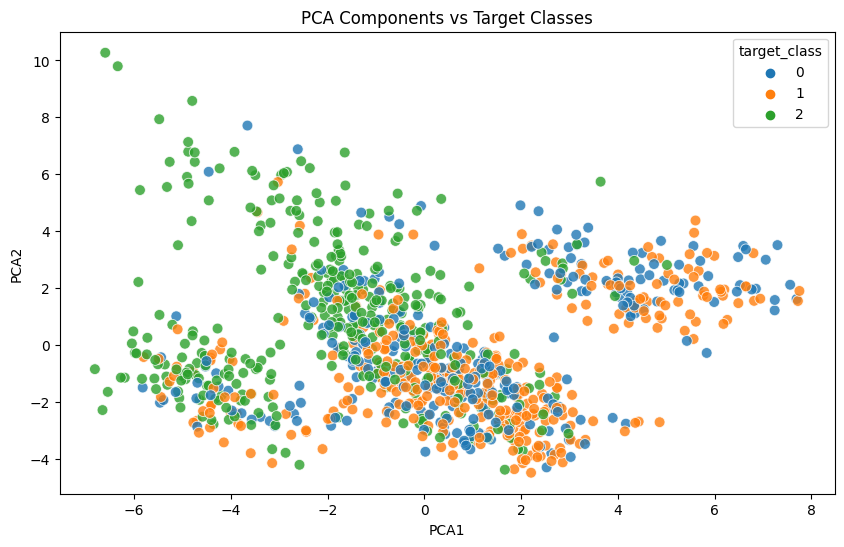

In [22]:
def plot_feature_engineering_vs_target(df, target_column, feature_engineering_type):
    """
    Plot the relationship between feature engineering outcomes (PCA components or KMeans clusters) 
    and the target classes.
    
    Parameters:
    df (DataFrame): The DataFrame containing transformed features and target classes.
    target_column (str): The name of the column containing the target classes.
    feature_engineering_type (str): The type of feature engineering performed ('KMeans', 'PCA', 'BOTH').
    """
    
    if feature_engineering_type == 'KMeans' or feature_engineering_type == 'BOTH':
        # Plotting KMeans clusters against the target
        plt.figure(figsize=(10, 6))
        sns.countplot(x='kmeans_cluster', hue=target_column, data=df)
        plt.title('KMeans Clusters vs Target Classes')
        plt.xlabel('KMeans Cluster')
        plt.ylabel('Count')
        plt.show()
        
    if feature_engineering_type == 'PCA' or feature_engineering_type == 'BOTH':
        # Plotting PCA components against the target
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='PCA1', y='PCA2', hue=target_column, data=df, palette="tab10", s=60, alpha=0.8)
        plt.title('PCA Components vs Target Classes')
        plt.xlabel('PCA1')
        plt.ylabel('PCA2')
        plt.show()

target_column = 'target_class'

plot_feature_engineering_vs_target(transformed_X_train_df, target_column, 'PCA')

TOD_PRES_R_2020_PREC

import pandas as pd

def extract_feature_importance_from_lr_model(models, model_key, feature_names):
    """
    Extracts and sorts feature importances for a given trained Logistic Regression model.
    
    Parameters:
        models (dict): Dictionary containing the trained models.
        model_key (str): Key for the Logistic Regression model in the models dictionary.
        feature_names (list): List of feature names used in the model training.
        
    Returns:
        sorted_feature_importances (pd.Series): Sorted feature importances.
    """
    # Extract the Logistic Regression model
    lr_model = models[model_key].named_steps['classifier']
    
    # Check if the model has 'coef_' attribute
    if not hasattr(lr_model, 'coef_'):
        raise AttributeError("The model does not have coefficients. Make sure it's a fitted Logistic Regression model.")
    
    # Extract and sort the feature importances
    feature_importances = pd.Series(lr_model.coef_[0], index=feature_names)
    sorted_feature_importances = feature_importances.abs().sort_values(ascending=False)
    
    return sorted_feature_importances

# Feature names used for training the model. Replace with your actual list.
feature_names = columns_to_use

# Extract and print sorted feature importances
sorted_feature_importances = extract_feature_importance_from_lr_model(models, 'LogisticRegression', feature_names)
print(sorted_feature_importances)

def iterative_feature_removal(df, target_col, initial_model_type='RF', num_iterations=3, num_features_to_remove=1):
    all_features = df.columns.tolist()
    all_features.remove(target_col)
    
    global_best_score = 0
    global_best_features = []
    
    for iteration in range(num_iterations):
        print(f"Starting iteration {iteration + 1}")
        best_score = 0
        best_features = []
        remaining_features = all_features.copy()

        while len(remaining_features) > 0:
            models, evaluation_results = prepare_and_fit_model(
                df[remaining_features + [target_col]], 
                target_col, 
                model_type=initial_model_type, 
                feature_importance=True, 
                evaluate_models=True
            )
            
            # Get the trained model
            clf = models[initial_model_type]
            
            # Get feature importance
            importances = clf.named_steps['classifier'].feature_importances_
            
            # Evaluate model
            X_test = df[remaining_features]
            y_test = df[target_col]
            y_pred = clf.predict(X_test)
            score = accuracy_score(y_test, y_pred)
            print(f"Score: {score} in iteration {iteration + 1}")
            
            if score > best_score:
                best_score = score
                best_features = remaining_features.copy()
                
            # Sort features by importance
            feature_importance = dict(zip(remaining_features, importances))
            sorted_features = sorted(feature_importance.items(), key=lambda x: x[1])
            
            # Remove the least important features
            features_to_remove = [f[0] for f in sorted_features[:num_features_to_remove]]
            for feature in features_to_remove:
                remaining_features.remove(feature)
            
            print(f"Removed {features_to_remove}, new best score: {best_score}, remaining features: {len(remaining_features)}")

        if best_score > global_best_score:
            global_best_score = best_score
            global_best_features = best_features

        # Reset all_features to the best from this iteration for the next cycle
        all_features = best_features
        

    return global_best_features

best_features = iterative_feature_removal(df_survey_processed, 'Q1_Candidate', initial_model_type='RF', num_iterations=10, num_features_to_remove=100)